In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [3]:
from test.common.basic_graph_creation_functions import create_fano_graph, setup_test_graph_elements, create_multitree, create_simple_tree

In [4]:
taxon, simple_tree_graph = create_simple_tree()
fragment = setup_test_graph_elements(taxon, simple_tree_graph)

In [5]:
fragment.D

array([[[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 0.]],

       [[1., 0., 0.],
        [0., 0., 0.],
        [0., 0., 1.]]])

In [6]:
d_out = np.sum(fragment.V.T, axis=2)
print(d_out)

[[1. 0. 0.]
 [1. 0. 0.]]


In [7]:
d_in = np.sum(fragment.V.T, axis=1)
print(d_in)

[[0. 1. 0.]
 [0. 0. 1.]]


In [8]:
D_in = np.apply_along_axis(np.diag, 1, d_in)
print(D_in)

[[[0. 0. 0.]
  [0. 1. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 1.]]]


In [9]:
D_out = np.apply_along_axis(np.diag, 1, d_out)
print(D_out)

[[[1. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[1. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


In [10]:
D = D_out + D_in

In [11]:
np.tensordot(D.T, fragment.I)

array([-2.,  1.,  1.])

Therefore, the total degree values for each node can be calculated from the incidence and the sum of inwards and outwards degree matrices

In [50]:
D_in_sqrt = np.nan_to_num(1.0/(np.sqrt(fragment.D_in)), posinf=0, neginf=0)
D_out_sqrt = np.nan_to_num(1.0/(np.sqrt(fragment.D_out)), posinf=0, neginf=0)

D =  np.nan_to_num(1.0/(np.sqrt(fragment.D)), posinf=0, neginf=0)

norm_ = D @ fragment.L @ D
print(norm_)

[[[ 1. -1.  0.]
  [ 0.  1.  0.]
  [ 0.  0.  0.]]

 [[ 1.  0. -1.]
  [ 0.  0.  0.]
  [ 0.  0.  1.]]]


C:\Users\keret\AppData\Local\Temp\ipykernel_27080\1048695790.py:1: RuntimeWarning: divide by zero encountered in divide
  D_in_sqrt = np.nan_to_num(1.0/(np.sqrt(fragment.D_in)), posinf=0, neginf=0)
C:\Users\keret\AppData\Local\Temp\ipykernel_27080\1048695790.py:2: RuntimeWarning: divide by zero encountered in divide
  D_out_sqrt = np.nan_to_num(1.0/(np.sqrt(fragment.D_out)), posinf=0, neginf=0)
C:\Users\keret\AppData\Local\Temp\ipykernel_27080\1048695790.py:4: RuntimeWarning: divide by zero encountered in divide
  D =  np.nan_to_num(1.0/(np.sqrt(fragment.D)), posinf=0, neginf=0)


In [48]:
np.linalg.eig(fragment.L)

(array([[1., 1., 0.],
        [1., 0., 1.]]),
 array([[[1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 2.22044605e-16, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]],
 
        [[1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
         [0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 2.22044605e-16]]]))

In [51]:
B = (fragment.L @ norm_)/6
B[B <= 0] = 1
np.sum(B*-np.log2(B))

1.723308333814104

In [15]:
fragment.V

array([[[0., 0.],
        [0., 0.],
        [0., 0.]],

       [[1., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 1.],
        [0., 0.],
        [0., 0.]]])

In [16]:
fragment.V @ fragment.I.T

array([[[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[-1.,  1.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[-1.,  0.,  1.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]]])

# Fano graph

In [17]:
taxon, fano_graph = create_fano_graph()
fragment_fano = setup_test_graph_elements(taxon, fano_graph)

In [18]:
d_out = np.sum(fragment_fano.V.T, axis=2)
D_out = np.apply_along_axis(np.diag, 1, d_out)

In [19]:
d_in = np.sum(fragment_fano.V.T, axis=1)
D_in = np.apply_along_axis(np.diag, 1, d_in)

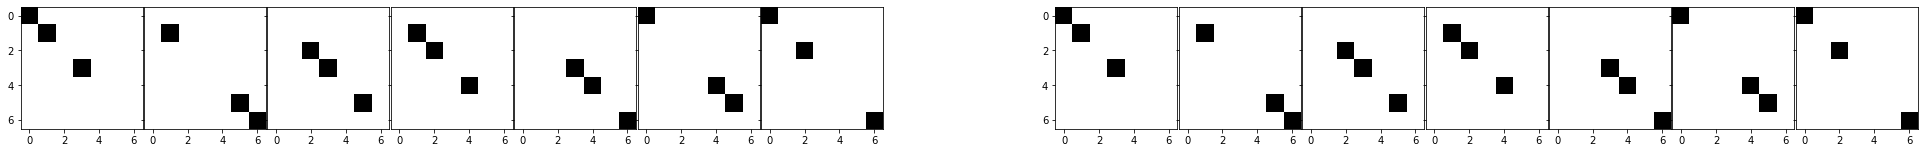

In [20]:
from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure(figsize=(34,34))
grid = ImageGrid(fig, 121, nrows_ncols=(1, 7))
for ax, im in zip(grid, D_out):
    ax.imshow(im, cmap=cm.binary)
grid = ImageGrid(fig, 122, nrows_ncols=(1, 7))
for ax, im in zip(grid, D_in):
    ax.imshow(im, cmap=cm.binary)

In [21]:
D = (D_in + D_out)

In [22]:
np.tensordot(D.T, fragment_fano.I)

array([12., 12., 12., 12., 12., 12., 12.])

In [23]:
D_sqrt = np.nan_to_num(1.0/(np.sqrt(fragment_fano.D)), posinf=0, neginf=0)


C:\Users\keret\AppData\Local\Temp\ipykernel_27080\655215004.py:1: RuntimeWarning: divide by zero encountered in divide
  D_sqrt = np.nan_to_num(1.0/(np.sqrt(fragment_fano.D)), posinf=0, neginf=0)


In [24]:
norm_ = D_sqrt @ fragment_fano.L @ D_sqrt
print(norm_)

[[[ 1.   -0.25  0.   -0.25  0.    0.    0.  ]
  [-0.25  1.    0.   -0.25  0.    0.    0.  ]
  [ 0.    0.    0.    0.    0.    0.    0.  ]
  [-0.25 -0.25  0.    1.    0.    0.    0.  ]
  [ 0.    0.    0.    0.    0.    0.    0.  ]
  [ 0.    0.    0.    0.    0.    0.    0.  ]
  [ 0.    0.    0.    0.    0.    0.    0.  ]]

 [[ 0.    0.    0.    0.    0.    0.    0.  ]
  [ 0.    1.    0.    0.    0.   -0.25 -0.25]
  [ 0.    0.    0.    0.    0.    0.    0.  ]
  [ 0.    0.    0.    0.    0.    0.    0.  ]
  [ 0.    0.    0.    0.    0.    0.    0.  ]
  [ 0.   -0.25  0.    0.    0.    1.   -0.25]
  [ 0.   -0.25  0.    0.    0.   -0.25  1.  ]]

 [[ 0.    0.    0.    0.    0.    0.    0.  ]
  [ 0.    0.    0.    0.    0.    0.    0.  ]
  [ 0.    0.    1.   -0.25  0.   -0.25  0.  ]
  [ 0.    0.   -0.25  1.    0.   -0.25  0.  ]
  [ 0.    0.    0.    0.    0.    0.    0.  ]
  [ 0.    0.   -0.25 -0.25  0.    1.    0.  ]
  [ 0.    0.    0.    0.    0.    0.    0.  ]]

 [[ 0.    0.    0.    0.    

In [25]:
D_sqrt @ fragment_fano.V @ D_sqrt

array([[[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.  , 0.25, 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.  , 0.25, 0.  , 0.  , 0.  , 0.  , 0.  ]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.25, 0.  , 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
        

In [26]:
np.sum(fragment_fano.D, axis=0)

array([[12.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., 12.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 12.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., 12.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 12.]])

In [27]:
np.sum(norm_, axis=0)

array([[ 3.  , -0.25, -0.25, -0.25, -0.25, -0.25, -0.25],
       [-0.25,  3.  , -0.25, -0.25, -0.25, -0.25, -0.25],
       [-0.25, -0.25,  3.  , -0.25, -0.25, -0.25, -0.25],
       [-0.25, -0.25, -0.25,  3.  , -0.25, -0.25, -0.25],
       [-0.25, -0.25, -0.25, -0.25,  3.  , -0.25, -0.25],
       [-0.25, -0.25, -0.25, -0.25, -0.25,  3.  , -0.25],
       [-0.25, -0.25, -0.25, -0.25, -0.25, -0.25,  3.  ]])

In [28]:
norm_

array([[[ 1.  , -0.25,  0.  , -0.25,  0.  ,  0.  ,  0.  ],
        [-0.25,  1.  ,  0.  , -0.25,  0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
        [-0.25, -0.25,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ]],

       [[ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
        [ 0.  ,  1.  ,  0.  ,  0.  ,  0.  , -0.25, -0.25],
        [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
        [ 0.  , -0.25,  0.  ,  0.  ,  0.  ,  1.  , -0.25],
        [ 0.  , -0.25,  0.  ,  0.  ,  0.  , -0.25,  1.  ]],

       [[ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  1.  , -0.25,  0.  , -0.25,  

In [29]:
B = (fragment_fano.L @ norm_)/6
B[B <= 0] = 1

In [30]:
np.sum(B*-np.log2(B))

6.53684061364179

In [31]:
e, v = np.linalg.eig(norm_)

In [32]:
e

array([[1.25, 0.5 , 1.25, 0.  , 0.  , 0.  , 0.  ],
       [1.25, 0.5 , 1.25, 0.  , 0.  , 0.  , 0.  ],
       [1.25, 0.5 , 1.25, 0.  , 0.  , 0.  , 0.  ],
       [1.25, 0.5 , 1.25, 0.  , 0.  , 0.  , 0.  ],
       [1.25, 0.5 , 1.25, 0.  , 0.  , 0.  , 0.  ],
       [1.25, 0.5 , 1.25, 0.  , 0.  , 0.  , 0.  ],
       [1.25, 0.5 , 1.25, 0.  , 0.  , 0.  , 0.  ]])

In [33]:
np.sum(e)

21.0

In [34]:
L_proj = np.sum(fragment_fano.L, axis=0)
e, v = np.linalg.eig(L_proj)

In [35]:
np.sum(e)

83.99999999999997

In [36]:
L_proj

array([[12., -1., -1., -1., -1., -1., -1.],
       [-1., 12., -1., -1., -1., -1., -1.],
       [-1., -1., 12., -1., -1., -1., -1.],
       [-1., -1., -1., 12., -1., -1., -1.],
       [-1., -1., -1., -1., 12., -1., -1.],
       [-1., -1., -1., -1., -1., 12., -1.],
       [-1., -1., -1., -1., -1., -1., 12.]])

Good source on graph normalization: [https://www.ripublication.com/irph/ijcsm/IJCSMv3n4_2.pdf](https://www.ripublication.com/irph/ijcsm/IJCSMv3n4_2.pdf) (Spectral Technique using Normalized Adjacency Matrices for Graph Matching, Vijayalaxmi S. Shigehalli & Vidya M. Shettar)

In [37]:
v = fragment_fano.I @ fragment_fano.V

In [38]:
v.shape

(7, 7, 7)

In [39]:
_norm = (fragment_fano.I.T @ fragment_fano.V.T @ fragment_fano.I)/6

In [40]:
np.sum(_norm, axis=1)

array([[3., 1., 1., 1., 1., 1., 1.],
       [1., 3., 1., 1., 1., 1., 1.],
       [1., 1., 3., 1., 1., 1., 1.],
       [1., 1., 1., 3., 1., 1., 1.],
       [1., 1., 1., 1., 3., 1., 1.],
       [1., 1., 1., 1., 1., 3., 1.],
       [1., 1., 1., 1., 1., 1., 3.]])

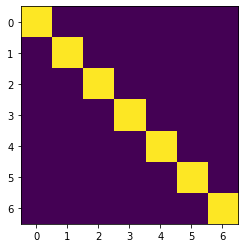

In [41]:
plt.imshow(np.sum(_norm, axis=1))

In [42]:
D

array([[[4., 0., 0., 0., 0., 0., 0.],
        [0., 4., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 4., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0.],
        [0., 4., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 4., 0.],
        [0., 0., 0., 0., 0., 0., 4.]],

       [[0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 4., 0., 0., 0., 0.],
        [0., 0., 0., 4., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 4., 0.],
        [0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0.],
        [0., 4., 0., 0., 0., 0., 0.],
        [0., 0., 4., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 4., 0., 0.],
      

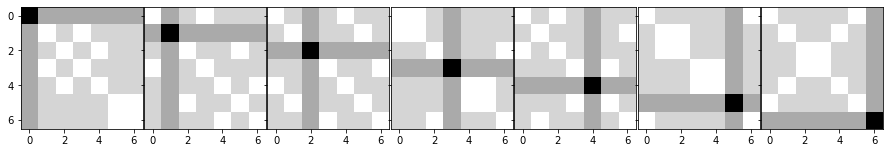

In [43]:
fig = plt.figure(figsize=(34,34))
grid = ImageGrid(fig, 121, nrows_ncols=(1, 7))
for ax, im in zip(grid, _norm):
    ax.imshow(im, cmap=cm.binary)

In [44]:
for vi in _norm:
    print(np.trace(vi))


1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [45]:
np.sum(fragment_fano.V.T @ fragment_fano.I, axis=0)

array([[2., 3., 3., 3., 3., 2., 2.],
       [2., 2., 3., 2., 3., 3., 3.],
       [3., 3., 2., 2., 3., 3., 2.],
       [2., 3., 2., 3., 2., 3., 3.],
       [3., 3., 3., 2., 2., 2., 3.],
       [3., 2., 2., 3., 3., 2., 3.],
       [3., 2., 3., 3., 2., 3., 2.]])

# Calculating Degree matrix

In [46]:
np.tensordot(fragment.V, fragment.I, axes=2)

array([ 0., -1., -1.])